In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('/content/Mercedes-Benz_Car_Testing_Dataset.csv')
df.head()


,ID,y,Material,Region,Testing Type,Engine Type,Transmission,Chassis Type,Safety Features,Testing Complexity,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,130.81,Steel,East,Safety Features Test,Gasoline,Automatic,SUV,Crumple Zones,Low,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,88.53,Titanium,North,Crash Test,Diesel,Automatic,Sedan,NaN,High,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,76.26,Aluminum,North,Safety Features Test,Diesel,Automatic,Coupe,NaN,Low,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,80.62,Steel,South,Durability Test,Diesel,Automatic,SUV,Intelligent Assistance,Medium,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,78.02,Aluminum,North,Emission Test,Electric,Automatic,SUV,NaN,High,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df['Material'].value_counts()


,count
Material,
Aluminum,915
Titanium,905
Carbon Fiber,903
Steel,901
Plastic,876


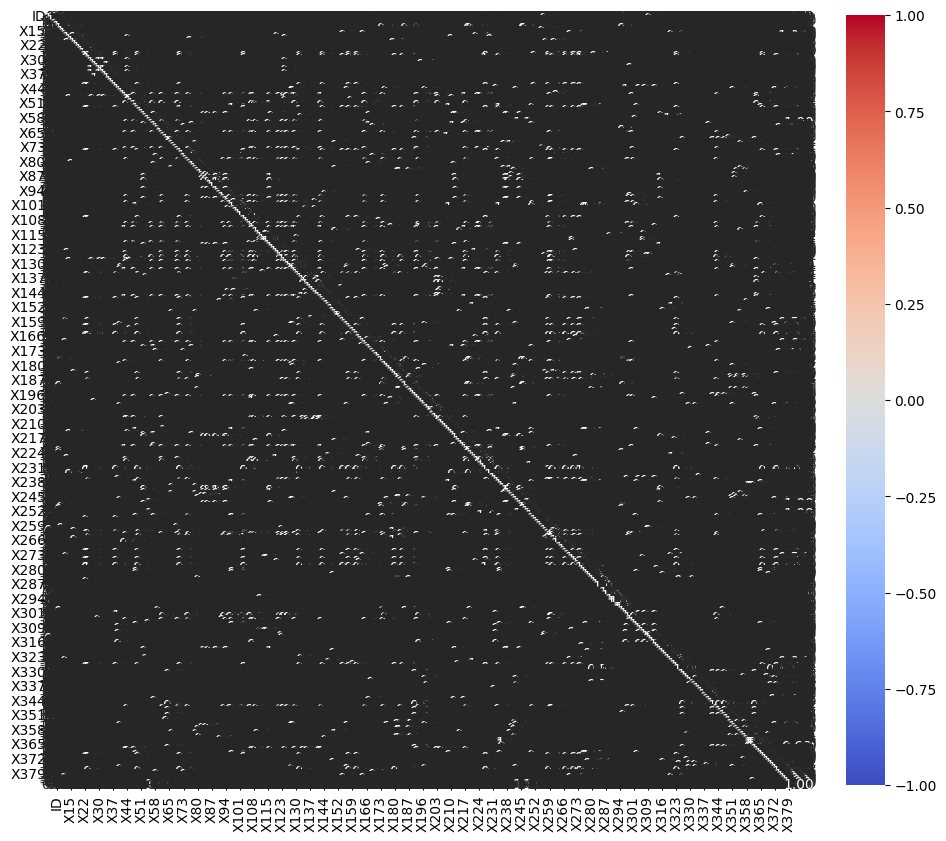

In [6]:
# Select only the numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for the numerical columns
correlation_matrix = numerical_df.corr()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.show()


In [7]:
# Drop rows where 'y' is NaN
df = df.dropna(subset=['y'])

# Re-define X and y after handling missing values
X = df.drop(['y', 'ID'], axis=1)
y = df['y']


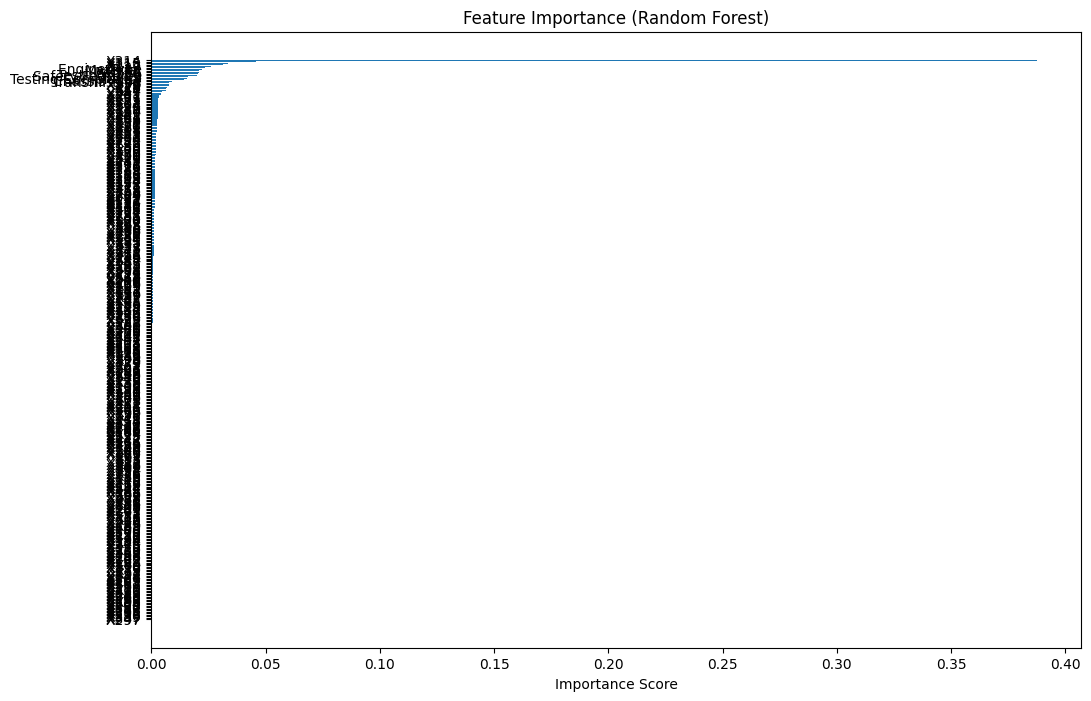

,Feature,Importance
305,X314,0.387754
306,X315,0.045844
114,X118,0.033426
115,X119,0.031395
122,X127,0.026141
3,Engine Type,0.023265
0,Material,0.021976
1,Region,0.020793
131,X136,0.020639
2,Testing Type,0.020511


In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt



# Preprocess the dataset (encoding categorical features)
# Let's use LabelEncoder for simplicity
label_encoder = LabelEncoder()

# List of columns to encode
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Separate features (X) and target variable (y)
X = df.drop(['y', 'ID'], axis=1)  # Drop 'y' and 'ID' columns, as 'y' is the target, and 'ID' is not a feature
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importance (Random Forest)')
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()

# Display the feature importances DataFrame
feature_importances.head(10)  # Show the top 10 important features


In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train)


In [10]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
# Train a RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 6.212473555027709
Root Mean Squared Error: 10.124594316243563


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [13]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_absolute_error')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')
# Retrain the model using the best parameters
best_model = grid_search.best_estimator_

# Step 6: Make Predictions on the Entire Test Set
y_pred_test = best_model.predict(X_test)

# Ensure the number of predictions matches the number of test rows
if len(y_pred_test) == len(y_test):
    # Step 7: Save Predictions to Excel

    # Since the dataset is split from the original data, we don’t have a separate `df_test`.
    # However, for saving results, let’s assume the test set IDs are in the same order:
    output = pd.DataFrame({'ID': df.loc[y_test.index, 'ID'], 'Predicted_y': y_pred_test})

    # Save to Excel
    output.to_excel('predictions_output.xlsx', index=False)

    print("Predictions saved as 'predictions_output.xlsx'.")
else:
    print(f"Mismatch in lengths: Predictions ({len(y_pred_test)}) vs Test Set ({len(y_test)})")



Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Predictions saved as 'predictions_output.xlsx'.
